# 🕸️ Scrapify

<!-- [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YonaniCodes/Scrapify/blob/main/notebooks/scrapify-demo.ipynb) -->


In [ ]:
import json

def clean_widget_metadata(nb_path, output_path=None):
    with open(nb_path, 'r', encoding='utf-8') as f:
        notebook = json.load(f)

    if 'widgets' in notebook.get('metadata', {}):
        del notebook['metadata']['widgets']

    output_path = output_path or nb_path
    with open(output_path, 'w', encoding='utf-8') as f:
        json.dump(notebook, f, indent=2)

# Example usage: download your notebook first, then clean and fix it
# clean_widget_metadata('/content/your_notebook.ipynb')


In [ ]:


!ls
# !jupyter nbconvert --to html scrapify_demo.ipynb


LICENSE  notebooks  README.md  requirements.txt  src


In [ ]:
import sys
import os

# Verify we're running in Colab - exit if not
try:
    import google.colab
except ImportError:
    raise RuntimeError("This script is designed to run only in Google Colab")

# Define repo details
repo_url = "https://github.com/YonaniCodes/Scrapify.git"
repo_path = "/content/Scrapify"

# Clone or update the repository
if not os.path.exists(repo_path):
    !git clone {repo_url} {repo_path}
else:
    %cd {repo_path}
    !git stash  # Stash any local changes
    !git pull

# Add src/ to Python path
sys.path.append(f"{repo_path}/src")

# Import the scraper function (replace with actual import)
# from scraper_module import scrape_function
!pip install -r requirements.txt
!pip install PyMuPDF


/content/Scrapify
No local changes to save
Already up to date.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.3 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement pywin32==306 (from versions: none)
ERROR: No matching distribution found for pywin32==306


In [ ]:
import subprocess

# Get output of ls command
output = subprocess.check_output("ls", shell=True).decode().splitlines()

# Now you can conditionally check
if "firebase-adminsdk.json" in output:
    print("Everything is ready you can start working 🎉🎉🎉🎉")
else:
    print("firebase-adminsdk.json not found.😒😒😒 please ask Yonani for the file")

firebase-adminsdk.json not found.😒😒😒 please ask Yonani for the file


In [ ]:
import sys
sys.path.append('/content/Scrapify/src')

In [ ]:
from scrapify import scrape
from scrapify import get_report
from preprocessing import normalize_amharic

import pandas as pd

## Steps to Scrape a website

1. Install the  `googlesearch-python` module
2. Define a function that takes two arguments `num_urls` and `search_query`. and return list of urls
3. call the `scrape` method by passing list of `urls` and `your_name` as a second paramete (optional).

In [ ]:
!pip install googlesearch-python

In [ ]:
from googlesearch import search

def get_links_from_simple_search(query, num_results):
    """
    Retrieves URLs from a simple Google search.

    Args:
        query (str): The search query.
        num_results (int): The desired number of search results. This is not directly supported by googlesearch,
                          so it will be used to limit the results after fetching.

    Returns:
        list: A list of URLs.
    """
    # Fetch the search results
    search_results = search(query, num_results=num_results)
    # Convert the generator object to a list
    urls = list(set(search_results))
    return urls

We need a function to filter if the url is already scraped we dont wanna send reques to our backend everyurl that is returned by the function `get_links_from_simple_search`

In [ ]:
def filter_url(urls):
# Assuming scraped_data and unscraped_data are pandas DataFrames with a 'url' column
  scraped,unscrape=get_report()
  scraped_data= pd.DataFrame(scraped)
  unscraped_data= pd.DataFrame(unscrape)
  filtered_urls = []
  for url in urls:
      # Check if the URL is NOT in both scraped_data.url and unscraped_data.url
      if url not in scraped_data['url'].values and url not in unscraped_data['url'].values:
          filtered_urls.append(url)
  return filtered_urls

# **Lets visualize our scraping status**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_scraping_report():
    """
    Generate a pie chart showing the ratio of scraped to unscraped URLs.
    Uses get_report() internally to fetch the data.
    """
    # Get the data
    scraped, unscraped = get_report()

    # Convert to DataFrames
    scraped_data = pd.DataFrame(scraped)
    unscraped_data = pd.DataFrame(unscraped)

    # Calculate counts
    scraped_count = len(scraped_data['url'])
    unscraped_count = len(unscraped_data['url'])

    # Prepare data for visualization
    labels = ['Scraped URLs', 'Unscraped URLs']
    sizes = [scraped_count, unscraped_count]
    colors = ['salmon', 'lightblue']  # Green and red

    # Create the figure
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(sizes,
           labels=labels,
           colors=colors,
           autopct=lambda p: f'{p:.1f}%\n({int(p/100*sum(sizes))})',
           startangle=90,
           wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
           textprops={'fontsize': 12})

    ax.set_title('Scraping Report: Scraped vs Unscraped URLs', pad=20, fontsize=14)
    plt.tight_layout()




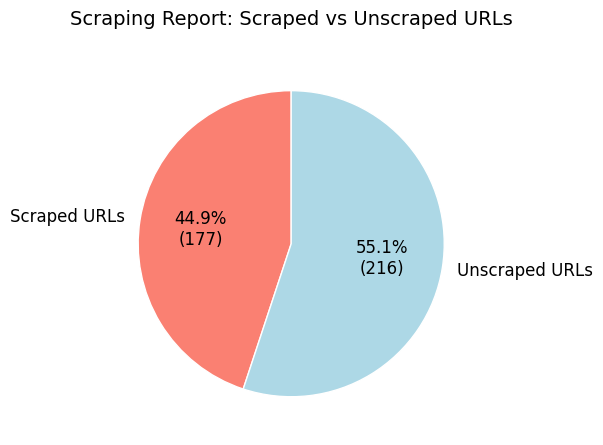

In [ ]:
# Example usage:
plot_scraping_report()

### Normalizing our data


In order to normalize our well define
1. deffine a function `read_jsonl_content` to read jsoln file
2. normalize the text returned using `normalize_and_save_data`
3. Finall define the wraper function `normalize_jsonl_file`



In [ ]:
import json

def read_jsonl_content(file_path, content_key='content'):
    """Returns a list of 'content' values from a .jsonl file."""
    content_values = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            stripped_line = line.strip()
            if stripped_line:
                record = json.loads(stripped_line)
                content_values.append(record[content_key])

    print(f"Read {len(content_values)} records from {file_path}.")
    return content_values  # Example: ["text1", "text2", ...]

In [ ]:
def normalize_and_save_data(jsonl_data, file_path):
    """Writes all JSONL entries as one continuous text blob."""
    with open(file_path, 'w', encoding='utf-8') as f:
        all_text = " ".join(normalize_amharic(text) for text in jsonl_data)  # No newlines
        f.write(all_text)

In [ ]:
def normalize_jsonl_file(input_file, output_file):
  jsonl_data=read_jsonl_content(test_file_path)
  normalize_and_save_data(jsonl_data, destination_file_path)

How to normalize data?

1. define `test_file_path` the jsonl file is found.
2. define `destination` you want to store the normaliez text file
3. call the function `normalize_and_save_data  ` with the two parameters
4. finnally call the wraper function

In [ ]:
test_file_path = '/content/Scrapify/extracted_data.jsonl'
destination_file_path = '/content/Scrapify/normalized.txt'

normalize_jsonl_file(test_file_path, destination_file_path)


Read 5 records from /content/Scrapify/extracted_data.jsonl.


### Chunking the data. now is the time to chunk all the data.

In [60]:
import os
import os
import shutil
from google.colab import files

def read_normalized_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()


def split_sentences(file_path: str) -> list:
    """
    Reads a .txt file and splits its content into sentences using ።, !, or ? as delimiters.

    Args:
        file_path: Path to the input text file.

    Returns:
        List of sentences (strings), each ending with a delimiter.
    """
    with open(file_path, "r", encoding="utf-8") as f:
        text = f.read()
        text = re.sub(r'\(\s*\)', '', text)
    sentences = []
    current_sentence = ""

    for char in text:
        current_sentence += char
        if char in {'።', '!', '?'}:
            stripped = current_sentence.strip()
            if stripped:
                sentences.append(stripped)
            current_sentence = ""

    if current_sentence.strip():
        sentences.append(current_sentence.strip())

    return sentences



import os

def chunk_and_save(sentences: list, output_dir: str, max_sentences: int = 10, max_chars: int = 1000, overlap: int = 2):
    """
    Splits list of sentences into chunks with a max of `max_sentences` and up to `max_chars` characters,
    with `overlap` sentences shared between consecutive chunks.

    Args:
        sentences: List of sentence strings.
        output_dir: Directory where chunks are saved.
        max_sentences: Maximum number of sentences per chunk.
        max_chars: Maximum characters per chunk.
        overlap: Number of overlapping sentences between consecutive chunks.
    """
    os.makedirs(output_dir, exist_ok=True)

    i = 0
    chunk_index = 1
    while i < len(sentences):
        chunk = []
        char_count = 0
        sentence_count = 0
        start_index = i

        while i < len(sentences) and sentence_count < max_sentences:
            sentence = sentences[i]
            if char_count + len(sentence) > max_chars and sentence_count > 0:
                break
            chunk.append(sentence)
            char_count += len(sentence)
            sentence_count += 1
            i += 1

        filename = os.path.join(output_dir, f"chunk_{chunk_index}.txt")
        with open(filename, "w", encoding="utf-8") as f:
            f.write(" ".join(chunk))
        print(f"Saved: {filename}")

        # Prepare for next chunk with overlap
        i = max(start_index + sentence_count - overlap, start_index + 1)
        chunk_index += 1

def zip_chunks_folder(folder_path):
    zip_file_path = f"{folder_path}.zip"
    shutil.make_archive(folder_path, 'zip', folder_path)
    return zip_file_path



In [ ]:
import datetime
normalized_file_path = '/content/Scrapify/normalized.txt'
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
destination_file_path = f'/content/Scrapify/chunks{timestamp}'
text=read_normalized_text(normalized_file_path)
chunks=chunk_text(text)
save_chunks_as_files(chunks,destination_file_path)





Saved 1016 files:
→ /content/Scrapify/chunks20250415_101226/chunk_1.txt
→ /content/Scrapify/chunks20250415_101226/chunk_2.txt
→ /content/Scrapify/chunks20250415_101226/chunk_3.txt
→ /content/Scrapify/chunks20250415_101226/chunk_4.txt
→ /content/Scrapify/chunks20250415_101226/chunk_5.txt
→ /content/Scrapify/chunks20250415_101226/chunk_6.txt
→ /content/Scrapify/chunks20250415_101226/chunk_7.txt
→ /content/Scrapify/chunks20250415_101226/chunk_8.txt
→ /content/Scrapify/chunks20250415_101226/chunk_9.txt
→ /content/Scrapify/chunks20250415_101226/chunk_10.txt
→ /content/Scrapify/chunks20250415_101226/chunk_11.txt
→ /content/Scrapify/chunks20250415_101226/chunk_12.txt
→ /content/Scrapify/chunks20250415_101226/chunk_13.txt
→ /content/Scrapify/chunks20250415_101226/chunk_14.txt
→ /content/Scrapify/chunks20250415_101226/chunk_15.txt
→ /content/Scrapify/chunks20250415_101226/chunk_16.txt
→ /content/Scrapify/chunks20250415_101226/chunk_17.txt
→ /content/Scrapify/chunks20250415_101226/chunk_18.txt
→

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Chunks folder zipped and ready for download: /content/Scrapify/chunks20250415_101226.zip


## Downloading the chunks

In [ ]:
zip_file_path = zip_chunks_folder(destination_file_path)
files.download(zip_file_path)

print(f"Chunks folder zipped and ready for download: {zip_file_path}")


##Uploading chunks

In [10]:
# prompt: a function which uploads chunck zip file and unzip it and return array of chunks

import zipfile
import os
from google.colab import files

def upload_and_unzip_chunks():
    """
    Uploads a zip file containing text chunks, unzips it, and returns a list of file paths.
    """
    try:
        uploaded = files.upload()
        if not uploaded:
            print("No file was uploaded.")
            return []

        zip_file_path = next(iter(uploaded.keys()))

        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall('/tmp/chunks')

        chunk_paths = []
        for filename in os.listdir('/tmp/chunks'):
            if filename.endswith(".txt"):
                chunk_paths.append(os.path.join('/tmp/chunks', filename))

        return chunk_paths

    except Exception as e:
        print(f"An error occurred: {e}")
        return []

def embed_chunks_separately(chunk_paths):
    """
    Given a list of chunk file paths, embed each one separately and save embeddings.
    """
    embeddings = []
    texts = []

    for path in chunk_paths:
        with open(path, 'r', encoding='utf-8') as f:
            text = f.read()
            texts.append(text)
            embedding = model.encode(text)
            embeddings.append(embedding)

    embeddings = np.array(embeddings)
    print(f"Created {len(embeddings)} embeddings with shape {embeddings.shape}")

    # Save all embeddings together in one npy file if needed
    np.save('/tmp/chunk_embeddings.npy', embeddings)
    print("Saved embeddings to /tmp/chunk_embeddings.npy")

    return embeddings, texts

## Code to generate vector embedding

In [ ]:
# Import SentenceTransformer
from sentence_transformers import SentenceTransformer

# Load the multilingual SBERT model
model = SentenceTransformer('paraphrase-xlm-r-multilingual-v1')

# Upload and process the chunks
chunks = upload_and_unzip_chunks()

# Now generate embeddings for the chunks
if chunks:
    vectors = model.encode(chunks, show_progress_bar=True)
    print("Embeddings generated successfully.")
else:
    print("No chunks were processed.")


RuntimeError: Failed to import transformers.integrations.integration_utils because of the following error (look up to see its traceback):
Failed to import transformers.modeling_utils because of the following error (look up to see its traceback):
partially initialized module 'torch._dynamo' has no attribute 'decorators' (most likely due to a circular import)

In [ ]:
import numpy as np

# Save embeddings to a file inside Colab
np.save('/tmp/embeddings.npy', vectors)
from google.colab import files

# Download the file to your PC
files.download('/tmp/embeddings.npy')


In [13]:
chunks=upload_and_unzip_chunks()

Saving chunks20250424_140246 (1).zip to chunks20250424_140246 (1) (1).zip


In [1]:
from google.colab import files
import numpy as np
import pandas as pd

def upload_and_load_embeddings(file_type='npy'):
    """
    Uploads an embeddings file to Colab and loads it into memory.

    Args:
        file_type (str): 'npy' for NumPy file, 'csv' for CSV file.

    Returns:
        Loaded embeddings as a NumPy array.
    """
    print("Please upload your embeddings file...")
    uploaded = files.upload()  # Opens a file chooser dialog

    if uploaded:
        file_name = list(uploaded.keys())[0]
        print(f"Uploaded file: {file_name}")

        if file_type == 'npy':
            embeddings = np.load(file_name)
        elif file_type == 'csv':
            embeddings = pd.read_csv(file_name).values
        else:
            raise ValueError("Unsupported file_type. Use 'npy' or 'csv'.")

        print(f"Loaded embeddings shape: {embeddings.shape}")
        return embeddings
    else:
        print("No file uploaded.")
        return None


In [2]:
uploaded_vectors=upload_and_load_embeddings()


Please upload your embeddings file...


Saving embedding.npy to embedding.npy
Uploaded file: embedding.npy
Loaded embeddings shape: (1620, 768)


In [3]:
uploaded_vectors

array([[ 0.04541074, -0.0420091 ,  0.07068787, ..., -0.0060804 ,
        -0.06528056,  0.07436642],
       [ 0.06237457,  0.07609733,  0.13392748, ..., -0.16357952,
        -0.18393779,  0.04481654],
       [ 0.10564897,  0.19870478,  0.10811338, ...,  0.02026673,
        -0.07213159,  0.0245387 ],
       ...,
       [ 0.06508578,  0.05455409,  0.1001512 , ...,  0.00784491,
        -0.10618253, -0.0273491 ],
       [ 0.08264251,  0.02732248,  0.09041416, ..., -0.10320223,
        -0.00357663,  0.02006194],
       [ 0.09338888,  0.01277862,  0.10651132, ..., -0.04242466,
        -0.15135428, -0.02959847]], dtype=float32)

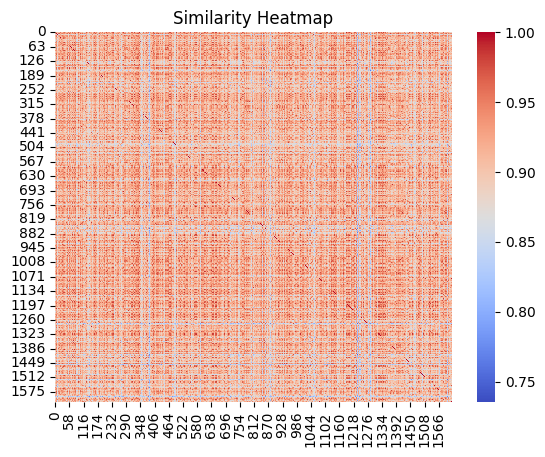

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between all embeddings
similarities = cosine_similarity(uploaded_vectors)
sns.heatmap(similarities, cmap='coolwarm')
plt.title('Similarity Heatmap')
plt.show()

## Similarity Check

In [20]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between all embeddings
similarities = cosine_similarity(uploaded_vectors)

# Example: Checking similarity between the first chunk and the second chunk
print(f"Cosine similarity between chunk 0 and chunk 1: {similarities[0][1]}")

# Example: Checking similarity between the first chunk and the third chunk
print(f"Cosine similarity between chunk 0 and chunk 2: {similarities[0][2]}")
print(chunk[0])


Cosine similarity between chunk 0 and chunk 1: 0.910802960395813
Cosine similarity between chunk 0 and chunk 2: 0.8770769834518433
/


In [5]:
!pip install faiss-cpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 28.1 MB/s eta 0:00:00


In [6]:
!pip install sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

## FAISS Similarity check

In [7]:
import faiss
import numpy as np

# Your vector dimension
d = uploaded_vectors.shape[1]

# Choose number of clusters (nlist) for IVF index
nlist = 100

# Set up the quantizer and index
quantizer = faiss.IndexFlatL2(d)  # L2 distance metric
index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)

# Train the index (required for IVF types)
index.train(np.array(uploaded_vectors))
index.add(np.array(uploaded_vectors))

In [8]:
index.nprobe = 10


In [14]:
# Import SentenceTransformer
from sentence_transformers import SentenceTransformer

# Load the multilingual SBERT model
model = SentenceTransformer('paraphrase-xlm-r-multilingual-v1')
query = "የሰብአዊ መብቶችን መጠበቅ በኢትዮጵያ ሕግ ውስጥ እንዴት ይታያል?"
query_vec = model.encode([query])  # query_vec shape: (1, d)

# Retrieve top_k nearest items
top_k = 5
distances, ids = index.search(query_vec, top_k)

# Use the IDs to fetch original data
retrieved_chunks = [chunks[i] for i in ids[0]]


In [15]:
retrieved_chunks

['/tmp/chunks/chunk_1192.txt',
 '/tmp/chunks/chunk_791.txt',
 '/tmp/chunks/chunk_4.txt',
 '/tmp/chunks/chunk_87.txt',
 '/tmp/chunks/chunk_296.txt']

## chunk by **sentences** and  Faiss

In [57]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np
import re

def split_sentences(file_path: str) -> list:
    with open(file_path, "r", encoding="utf-8") as f:
        text = f.read()
        text = re.sub(r'\(\s*\)', '', text)
    sentences = []
    current_sentence = ""

    for char in text:
        current_sentence += char
        if char in {'።', '!', '?'}:
            stripped = current_sentence.strip()
            if stripped:
                sentences.append(stripped)
            current_sentence = ""
    if current_sentence.strip():
        sentences.append(current_sentence.strip())

    return sentences

# Load and embed sentences directly
sentences = split_sentences("/content/normal.jsonl")
model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
embeddings = model.encode(sentences, convert_to_numpy=True)

# Build FAISS index at sentence level
index = faiss.IndexFlatL2(embeddings.shape[1])
index.add(embeddings)

# Define query and retrieve top 5 similar sentences
def test_sentence_query(query, sentences, model, index, top_k=5):
    query_embedding = model.encode([query], convert_to_numpy=True)
    D, I = index.search(query_embedding, top_k)
    print("🔍 Top 5 semantically similar sentences:\n")
    for rank, idx in enumerate(I[0], 1):
        print(f"{rank}. {sentences[idx]}\n")

# Example query
test_sentence_query("አመልካች የመሳሪያ ማስገባት አላሳካም ብሎ የቀረበው አቤቱታ በህግ ተቀባይነት አለው?", sentences, model, index)


🔍 Top 5 semantically similar sentences:

1. ፍ ር ድ የይግባኝ አቤቱታ የማቅረቢያ ጊዜ አልፏል ወይስ አላለፈም ?

2. የሚለውን አከራካሪ ነጥብ በግራ ቀኙ መካከል በተደረገው ክርክር ከተረጋገጠውና ይህንኑ የተረጋገጠውን ጉዳይ መነሻ አድርጎ ይግባኝ ሰሚው የፌዴራል ከፍተኛ ፍርድ ቤት ለዚሁ ጭብጥ ከሰጠው የመጨረሻ ዳኝነት ጋር አገናዝበን እንደሚከተለው ተመልክተናል።

3. የሚለውን አከራካሪ ነጥብ ዳኝነቱ መሰጠቱን ከተረዳበት ጊዜ ጀምሮ ከቀረው ዘጠኝ ቀን አንፃር በማየት ዘጠኝ ቀን የይግባኝ አቤቱታ ለማቅረብ ያስችል ነበር አልነበረም ከሚለው አንፃር ሊታይ የሚገባው አይደለም።

4. በዋናው ጉዳይ የፌዴራል የመጀመሪያ ደረጃ ፍርድ ቤት በመ ቁ 16273 ፍርድ ሰጥቶ ግራ ቀኙን ካሰናበተ በኋላ የአሁኗ ተጠሪ ግንቦት 21 2004 ኣ . ም በተፃፈ አቤቱታ በፍ ብ ስ ስ ህ ቁ 208 መሰረት በጠየቁት ዳኝነት መሰረት ፍርድ ቤቱ የአሁን አመልካችን ሳይጠራ ጉዳዩን እንደገና ተመልክቶ ግንቦት 22 ቀን 2004 በጥያቄው መሰረት ዳኝነት የሰጠበት ስለመሆኑ ፤ እንዲሁም ይህ መዝገብ ከተዘጋ በኋላ ትእዛዝ የተሰጠ በመሆኑ የአሁን አመልካች በፍርድ አፈፃፀም መምሪያ በኩል ሀምሌ 13 ቀን 2004 ኣ . ም የደረሰው ስለመሆኑ የአሁን ተጠሪ ማስተባበያ ያቀረበበት በመሆኑና ይግባኝ ሰሚው ፍርድ ቤትም እነዚህኑ ፍሬ ነገሮች መነሻ አድርጎ ዳኝነት የሰጠበት እንደመሆኑ መጠን እነዚህ ከዚህ በላይ በተጠቀሱት ፍሬነገሮች የተረጋገጡ ጉዳዮች ናቸው።

5. ፡ የጉዳዩ አመጣጥ አጠር አጠር ባለመልኩ ከላይ የተገለፀው ሲሆን ይህ ችሎትም የግራ ቀኙን ክርክር ለሰበር አቤቱታው መነሻ ከሆነው ውሳኔ እና አግባብነት ካላቸው ድንጋጌዎች ጋር በማገናዘብ ጉዳዩን በሚከተለው መልኩ መርምሮታል።


# Faiss by chunk of sentences

In [ ]:
import os
import re

def split_sentences(file_path: str) -> list:
    with open(file_path, "r", encoding="utf-8") as f:
        text = f.read()
        text = re.sub(r'\(\s*\)', '', text)
    sentences = []
    current_sentence = ""
    for char in text:
        current_sentence += char
        if char in {'።', '!', '?'}:
            stripped = current_sentence.strip()
            if stripped:
                sentences.append(stripped)
            current_sentence = ""
    if current_sentence.strip():
        sentences.append(current_sentence.strip())
    return sentences

def chunk_and_save(sentences: list, output_dir: str, max_sentences: int = 5, max_chars: int = 30000, overlap: int = 1):
    os.makedirs(output_dir, exist_ok=True)
    chunks = []
    i = 0
    while i < len(sentences):
        chunk = []
        char_count = 0
        sentence_count = 0
        start_index = i
        while i < len(sentences) and sentence_count < max_sentences:
            sentence = sentences[i]
            if char_count + len(sentence) > max_chars and sentence_count > 0:
                break
            chunk.append(sentence)
            char_count += len(sentence)
            sentence_count += 1
            i += 1
        chunks.append(" ".join(chunk))
        i = max(start_index + sentence_count - overlap, start_index + 1)
    return chunks



In [27]:
import numpy as np
from sentence_transformers import SentenceTransformer

def embed_and_save(chunks, model_name="paraphrase-xlm-r-multilingual-v1", save_path="/content/embeddings.npy"):
    model = SentenceTransformer(model_name)
    embeddings = model.encode(chunks, convert_to_numpy=True)
    np.save(save_path, embeddings)
    return embeddings, model


In [28]:
import faiss

def build_faiss_index(embeddings, faiss_path="/content/faiss.index"):
    dim = embeddings.shape[1]
    index = faiss.IndexFlatL2(dim)
    index.add(embeddings)
    faiss.write_index(index, faiss_path)
    return index


In [29]:
def test_query(query, chunks, model, index, top_k=5):
    query_embedding = model.encode([query], convert_to_numpy=True)
    D, I = index.search(query_embedding, top_k)
    print("🔍 Top similar chunks:\n")
    for idx in I[0]:
        print(f"--- Chunk {idx+1} ---\n{chunks[idx]}\n")


In [56]:
from google.colab import files
# uploaded = files.upload()
# file_path = next(iter(uploaded))  # Get uploaded file path

# Split → Chunk → Embed → FAISS
sentences = split_sentences("/content/normal.jsonl")
chunks = chunk_and_save(sentences, output_dir="/content/chunks")
embeddings, model = embed_and_save(chunks)
index = build_faiss_index(embeddings)

# Sample Query Test
retrived_chunks=test_query("አመልካች የመሳሪያ ማስገባት አላሳካም ብሎ የቀረበው አቤቱታ በህግ ተቀባይነት አለው?", chunks, model, index)


🔍 Top similar chunks:

--- Chunk 4 ---
አመልካች መሳሪያውን ለማስገባት የሚመለከተው አካል የከለከለው ስለመሆኑ በማስረጃ ያለማስደገፉ ከተረጋገጠ ደግሞ የፍ ብ ህ ቁ 1792 ድንጋጌን ጠቅሶ የሚያቀርበው ክርክር ተቀባይነት የሚገኝበት አግባብ የለም። ወደ ዋናው ጭብጥ ስንመለስም ከላይ እንደተገለፀው በተጠሪ ከተጠየቁት ዳኝነቶች መካከል አንዱ የቅድመ ክፍያ ገንዘብ እጥፍ ሁኖ እንዲመለስ ሲሆን የስር ፍርድ ቤት ዳኝነት የሰጠው ግን አመልካች እቃውን ማስገባት 162 ከነበረበት ከሀምሌ 12 ቀን 2002 ኣ ም ጀምሮ በሚታሰብ 427 ቀናት ማለፋቸውንና ለእነዚህ ቀናትም የውሉን ጠቅላላ ዋጋ ብር 2 ሲታሰብ የሚመጣውንና ከውሉ ዋጋ 10 ያልበለጠውን መቀጮ አመልካች በውሉ አንቀፅ 2 ለ እና በፍ ብ ህ ቁ 1731 ለመከፈል ይገደዳል የሚል ምክንያት ይዞ ሲሆን ይግባኝ ሰሚው ፍርድ ቤትም አመልካች የቅደም ክፍያ የከፈለ ሁኖ እያለ ቀብድ አድርጎ እጥፍ መጠየቁ ስህተት መሆኑን አምኖ ክሱ ሊመሰረት የጠየቀው ዳኝነት የቅድመ ክፍያ እጥፍ ቢሆንም ክሱ በተሰማበት ወቅት የመቀጫ ገንዘብ መጠየቁ ተረጋግጧል በሚል ምክንያት የስር ፍርድ ቤት ውሳኔ ማፅናቱን ተገንዝበናል። በመስረቱ ክርክር የሚመራውና ዳኝነት የሚሰጠው በህጉ በተዘረጋው ስርኣት መሰረት ነው። በህጉ ከተዘረጋው የክርክር አመራርና የዳኝነት አሰጣት ስርኣት ውጪ ክርክር የመምራትና ዳኝነት የመስጠት አካሄድ የዳኝነት ሰጪ አካሉን ገለልተኝነት ጥያቄ ውስጥ የሚያስገባ መሆኑ የሚታመን ነው። አንድ ፍርድ ቤት ዳኝነት የሚሰጠው በተከራካሪ ወገን የተጠየቀ ሁኖ በህጉና በውሉ የተፈቀደ መሆኑን በጥንቃቄ አረጋግጦ ሲሆን ተከራካሪ ወገን በህጉ ወይም በውሉ የተፈቀደለትን መፍትሄ ለማግኘት በግልፅ ዳኝነት መጠየቅ የሚገባው መሆኑን ስለ

# GPT 2 loading

In [54]:
from transformers import pipeline, AutoTokenizer

# Load GPT-2 and tokenizer
qa_pipeline = pipeline("text-generation", model="gpt2", tokenizer="gpt2")
tokenizer = AutoTokenizer.from_pretrained("gpt2")

def generate_rag_answer(query, chunks, model, index, top_k=5):
    query_embedding = model.encode([query], convert_to_numpy=True)
    D, I = index.search(query_embedding, top_k)

    # Aggregate top-k chunks into a single context string
    raw_context = " ".join([chunks[i] for i in I[0]])

    # Build prompt
    prompt = f"Context: {raw_context}\n\nQuestion: {query}\nAnswer:"

    # Truncate prompt tokens to 1024
    input_ids = tokenizer.encode(prompt, truncation=True, max_length=1024, return_tensors="pt")

    # Generate response
    result = qa_pipeline(
        tokenizer.decode(input_ids[0], skip_special_tokens=True),
        max_new_tokens=100,
        pad_token_id=tokenizer.eos_token_id,
        do_sample=True
    )[0]['generated_text']

    print("🧠 RAG-Based Answer:\n", result)


Device set to use cpu


In [55]:
query = "አመልካች የመሳሪያ ማስገባት አላሳካም ብሎ የቀረበው አቤቱታ በህግ ተቀባይነት አለው?"
chunks = chunk_and_save(sentences, output_dir="/content/chunks")
embeddings, model = embed_and_save(chunks)
index = build_faiss_index(embeddings)

generate_rag_answer(query, chunks, model, index)


This is a friendly reminder - the current text generation call will exceed the model's predefined maximum length (1024). Depending on the model, you may observe exceptions, performance degradation, or nothing at all.


IndexError: index out of range in self

In [ ]:
sentences